In [1]:
import pandas as pd
import numpy as np
from sklearn import naive_bayes
from matplotlib import pyplot as plt
%matplotlib notebook
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.kde import KernelDensity
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)

## 4a).
Read the data file found in this link and save the data into a data frame called adultTrain. Since
the column headings are not in the data you must make sure that when reading the data, you
take this fact into account. Remember that the read.csv function in R and the pd.read.csv
function in Pandas library in Python by default treat the first row as the title row. You must
turn off this action. Furthermore, pay attention that missing data is represented by " ?" symbol
(note the blank followed by \?"). As mentioned, this data does not contain headers. The headers
can be found in a different file in the same directory containing the adult data. To make your
life easier, we have provided the headers, in the correct order below:
"age", "workclass", "fnlwgt", "education", "educationNum", "maritalStatus", "occupation",
"relationship", "race", "sex", "capitalGain", "capitalLoss", "hoursPerWeek", "nativeCountry",
"income"

Print the head and tail to make sure it is read properly. Also print the list of data that are
categorical, along with the levels in each of them. These should be done to make sure the data
is read correctly.

The data has over 32,000 items in it. It may be helpful to build your model and answer the
following questions for a small sample, say 500 items first. When you are confident that your
model works, you can run it on the whole data.

In [2]:
adultTrain = pd.read_csv('D:/Jupyter/algorithmic_machine_learning/hw02/data/adult.data', 
                         header = None, sep = ',', na_values = ' ?', keep_default_na = False)
adultTrain = adultTrain.replace(' ?', 'NA') # replace 'NA' to '?'
adultTrain = adultTrain.dropna()
adultTrain = adultTrain.rename(columns={0:"age", 1:"workclass", 2:"fnlwgt", 3:"education", 4:"educationNum",5:"maritalStatus", 
                           6:"occupation", 7:"relationship", 8:"race", 9:"sex", 10:"capitalGain", 
                           11:"capitalLoss", 12:"hoursPerWeek", 13:"nativeCountry",14:"income"})
adultTrain.shape

(30162, 15)

In [3]:
# display the head and tail of the adultTrain
display(adultTrain.tail(), adultTrain.head())

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# sample 500 items and reset the index
adultTrain_sample = adultTrain.sample(500).reset_index()
adultTrain_sample = adultTrain_sample.drop(['index'], axis=1) # drop the column of index
adultTrain_sample

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,30,Private,202450,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,65,United-States,>50K
1,40,Private,217120,10th,6,Divorced,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
2,23,Private,240398,Bachelors,13,Never-married,Sales,Not-in-family,Black,Male,0,0,15,United-States,<=50K
3,47,State-gov,100818,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
4,43,Private,191814,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,7688,0,50,United-States,>50K
5,58,Private,34788,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1887,40,United-States,>50K
6,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
7,37,Private,167415,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
8,52,Private,217663,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K
9,18,Private,218889,9th,5,Never-married,Other-service,Own-child,Black,Male,0,0,35,United-States,<=50K


## 4b).
Load the naivebayes package or the analogeous package in Python. Build a model called
naiveModelA with income as the response variable, and other features as independent variables.
The model should use no Laplace smoothing, and treat numerical data non-parametrically using
a kernel based method. Print a summary of the model.

In [5]:
# Seperate the data into data and target
adultTrain_sample_data = adultTrain_sample.iloc[0:500,0:14]
# adultTrain_sample_data
adultTrain_sample_target = adultTrain_sample.iloc[0:500,14]
# adultTrain_sample_target

# category the data
adultTrain_sample_target = adultTrain_sample_target.astype('category')
c_adultTrain_sample_target = adultTrain_sample_target.values
c_adultTrain_sample_target = c_adultTrain_sample_target.codes

# Drop the continuous variables
adultTrain_sample_data_drop = adultTrain_sample_data.drop(columns = ['age','educationNum','capitalGain',
                                                          'capitalLoss','hoursPerWeek'])
temp_adultTrain_sample_data = []
for i in range(len(adultTrain_sample_data_drop.columns)):
    adultTrain_sample_data_drop.iloc[0:500,i] = adultTrain_sample_data_drop.iloc[0:500,i].astype('category')
    c_adultTrain_sample_data_drop = adultTrain_sample_data_drop.iloc[0:500,i].values
    c_adultTrain_sample_data_drop = c_adultTrain_sample_data_drop.codes
    temp_adultTrain_sample_data.append(c_adultTrain_sample_data_drop)


c_adultTrain_sample_data = pd.DataFrame(temp_adultTrain_sample_data).T
# Combine the continuous variables
c_adultTrain_sample_data[9] = adultTrain_sample_data['age']
c_adultTrain_sample_data[10] = adultTrain_sample_data['educationNum']
c_adultTrain_sample_data[11] = adultTrain_sample_data['capitalGain']
c_adultTrain_sample_data[12] = adultTrain_sample_data['capitalLoss']
c_adultTrain_sample_data[13] = adultTrain_sample_data['hoursPerWeek']

# adultTrain_sample_data.dtypes

In [6]:
# Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(c_adultTrain_sample_data)
kde.score_samples(c_adultTrain_sample_data)

array([3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238321,
       3.45238321, 3.45238321, 3.45238321, 3.45238321, 3.45238

In [7]:
# Simulate the Naives Bayes Model
gnb = GaussianNB(var_smoothing = False)
naiveModelA = gnb.fit(c_adultTrain_sample_data, c_adultTrain_sample_target).predict(c_adultTrain_sample_data)
print("Number of mislabeled points out of a total {0} points : {1}".
      format(c_adultTrain_sample_data.shape[0], (c_adultTrain_sample_target != naiveModelA).sum())
     )

Number of mislabeled points out of a total 500 points : 100


## 4c).
From the model extract the estimated class conditional probabilities of males and females under the sex feature for people with income over 50K and people with income under 50K per year.

In [8]:
male = adultTrain[adultTrain['sex'] == ' Male']
adultTrain_male_over5k = adultTrain[(adultTrain['sex'] == ' Male') & (adultTrain['income'] == ' >50K')]
adultTrain_male_under5k = adultTrain[(adultTrain['sex'] == ' Male') & (adultTrain['income'] == ' <=50K')]
female = adultTrain[adultTrain['sex'] == ' Female']
adultTrain_female_over5k = adultTrain[(adultTrain['sex'] == ' Female') & (adultTrain['income'] == ' >50K')]
adultTrain_female_under5k = adultTrain[(adultTrain['sex'] == ' Female') & (adultTrain['income'] == ' <=50K')]

prob1 = len(adultTrain_male_over5k.index) / len(male.index)
prob2 = len(adultTrain_male_under5k.index) / len(male.index)
print(' Under the male, the probability of income >50K is : {0}\nthe probability of income <=50K is : {1}'.format(prob1, prob2))

prob3 = len(adultTrain_female_over5k.index) / len(female.index)
prob4 = len(adultTrain_female_under5k.index) / len(female.index)
print('\n\n','Under the male, the probability of income >50K is : {0}\nthe probability of income <=50K is : {1}'.format(prob3, prob4))

 Under the male, the probability of income >50K is : 0.3138370951913641
the probability of income <=50K is : 0.686162904808636


 Under the male, the probability of income >50K is : 0.11367818442036394
the probability of income <=50K is : 0.8863218155796361


## 4d).
From the model extract the estimated class conditional mean and standard deviation of hoursPerWeek
feature for people with income over 50K and people with income under 50K per year. Also
draw boxplots for this feature for each income class.(You may wish to examine this information
for all numerical and categorical features to get a feel of each one's relation with income level.)

In [9]:
data_hoursPerweek_over5k = adultTrain[(adultTrain['income'] == ' >50K')]
data_hoursPerweek_over5k = data_hoursPerweek_over5k['hoursPerWeek']

data_hoursPerweek_under5k = adultTrain[(adultTrain['income'] == ' <=50K')]
data_hoursPerweek_under5k = data_hoursPerweek_under5k['hoursPerWeek']

print('The standard of deviation of hoursPerWeek is:{0} '.format(data_hoursPerweek_over5k.std()))
print('\n')
print('The mean of hoursPerWeek is:{0} '.format(data_hoursPerweek_over5k.mean()))
# data_hoursPerweek_over5k.mean()

The standard of deviation of hoursPerWeek is:10.73698663369768 


The mean of hoursPerWeek is:45.70657964837507 


Text(0.5, 1.0, 'Under $50K')

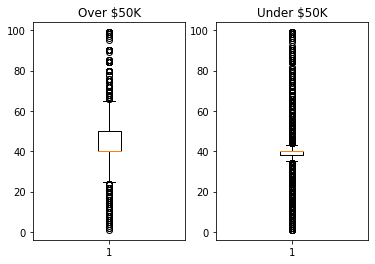

In [10]:
# Boxplot of hourPerWeek
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Boxplot of income over $50K
ax1.boxplot(data_hoursPerweek_over5k)
ax1.set_title('Over $50K')
# Boxplot of income under $50K
ax2.boxplot(data_hoursPerweek_under5k)
ax2.set_title('Under $50K')

## 4e).
Form the UCI archive read the test data from this link and save it in the data frame adultTest.
If you examine the original file, you will see that the first few lines are comments, and start with
the character "|". Make sure to set the comments character while reading the data, so these
lines are skipped. Also, like the training data, there are missing items represented by " ?" (with
a blank before "?"). Make sure to account for them. Finally, unfortunately in this test data the
values of income are "<=50K." and ">50K." with an extra"." You need to pre-process this data
and remove these dots.

Once the test data is read, predict the income level of the test data, and save them in the vector naivePredA. Then compare it to the actual values. Print the confusion matrix and the error rate
for the test data.

In [11]:
adultTest = pd.read_csv('D:/Jupyter/algorithmic_machine_learning/hw02/data/adult.test', 
                         header = None, sep = ',', na_values = ' ?', keep_default_na = False)
adultTest = adultTest.replace(' ?', 'NA') # replace 'NA' to '?'
adultTest = adultTest.dropna()
adultTest = adultTest.rename(columns={0:"age", 1:"workclass", 2:"fnlwgt", 3:"education", 4:"educationNum",5:"maritalStatus", 
                           6:"occupation", 7:"relationship", 8:"race", 9:"sex", 10:"capitalGain", 
                           11:"capitalLoss", 12:"hoursPerWeek", 13:"nativeCountry",14:"income"})
adultTest

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K.


In [12]:
# remove the '.' in '50K.'
adultTest['income'] = adultTest['income'].replace([' <=50K.', ' >50K.'], [' <=50K', ' >50K'])
adultTest

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [13]:
# Category the variables
# Seperate the data into data and target
adultTest_data = adultTest.iloc[0:15060, 0:14]
adultTest_target = adultTest.iloc[0:15060,14]

# category the data
adultTest_target = adultTest_target.astype('category')
c_adultTest_target = adultTest_target.values
c_adultTest_target = c_adultTest_target.codes

# Drop the continuous variables
adultTest_data_drop = adultTest_data.drop(columns = ['age','educationNum','capitalGain',
                                                          'capitalLoss','hoursPerWeek'])
temp_adultTest_data = []
for i in range(len(adultTest_data.columns)):
    adultTest_data.iloc[0:15060,i] = adultTest_data.iloc[0:15060,i].astype('category')
    c_adultTest_data = adultTest_data.iloc[0:15060,i].values
    c_adultTest_data = c_adultTest_data.codes
    temp_adultTest_data.append(c_adultTest_data)


c_adultTest_data = pd.DataFrame(temp_adultTest_data).T
# Combine the continuous variables
# c_adultTest_data[9] = adultTest_data['age']
# c_adultTest_data[10] = adultTest_data['educationNum']
# c_adultTest_data[11] = adultTest_data['capitalGain']
# c_adultTest_data[12] = adultTest_data['capitalLoss']
# c_adultTest_data[13] = adultTest_data['hoursPerWeek']

# adultTest.dtypes

In [14]:
# Simulate the NaiveBayes model
gnb1 = GaussianNB(var_smoothing = False)
# gnb1 = MultinomialNB

naivePredA = gnb1.fit(c_adultTest_data, c_adultTest_target).predict(c_adultTest_data)
print("Number of mislabeled points out of a total {0} points : {1}".
      format(c_adultTest_data.shape[0], (c_adultTest_target != naivePredA).sum())
     )
print('The error rate of this model is : {0}'.format((c_adultTest_target != naivePredA).sum() / c_adultTest_data.shape[0]))
# Confusion Matrix
confusion_matrix(c_adultTest_target, naivePredA)

Number of mislabeled points out of a total 15060 points : 2802
The error rate of this model is : 0.18605577689243027


array([[10506,   854],
       [ 1948,  1752]], dtype=int64)

## 4f).
Repeat parts 4b)-4e) but this time assume all numerical variables follow the normal distribution
for numerical features. How does this change affect the test error rate?

In [15]:
# Extract all the numerical features
adultTest_n_data = adultTest[['age','fnlwgt','capitalGain','capitalLoss','hoursPerWeek']]

In [16]:
# Simulate the NaiveBayes model
gnb2 = GaussianNB()
naivePredA = gnb2.fit(adultTest_n_data, c_adultTest_target).predict(adultTest_n_data)
print("Number of mislabeled points out of a total {0} points : {1}".
      format(adultTest_n_data.shape[0], (c_adultTest_target != naivePredA).sum())
     )
print('The error rate of this model is : {0}'.format((c_adultTest_target != naivePredA).sum() / adultTest_n_data.shape[0]))
# Confusion Matrix
confusion_matrix(c_adultTest_target, naivePredA)

Number of mislabeled points out of a total 15060 points : 3186
The error rate of this model is : 0.21155378486055776


array([[10738,   622],
       [ 2564,  1136]], dtype=int64)

The error smaller than before when we treat it as normal distribution.

## 4g).
Now load the tree library in R or the analogeous library in Python and repeat parts 4b)-4e)
for the default tree model. Also, print the resulting tree. Compare the error rate with the naive
Bayes models.

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(c_adultTest_data, c_adultTest_target)#.predict(c_adultTest_data)
clf1 = clf.predict(c_adultTest_data)
print("Number of mislabeled points out of a total {0} points : {1}".
      format(c_adultTest_data.shape[0], (c_adultTest_target != clf).sum())
     )
print('The error rate of this model is : {0}'.format((c_adultTest_target != clf).sum() / c_adultTest_data.shape[0]))
# Confusion Matrix
confusion_matrix(c_adultTest_target, clf1)

Number of mislabeled points out of a total 15060 points : 15060
The error rate of this model is : 1.0


array([[11360,     0],
       [    1,  3699]], dtype=int64)

[Text(229.93631156114256, 215.175, 'X[7] <= 0.5\nentropy = 0.371\nsamples = 15060\nvalue = [11360, 3700]'),
 Text(143.9140350968301, 210.645, 'X[4] <= 10.5\nentropy = 0.496\nsamples = 6203\nvalue = [3375, 2828]'),
 Text(96.54764980840136, 206.115, 'X[10] <= 71.0\nentropy = 0.445\nsamples = 4162\nvalue = [2771, 1391]'),
 Text(52.413591034767464, 201.585, 'X[4] <= 7.5\nentropy = 0.423\nsamples = 3975\nvalue = [2767, 1208]'),
 Text(9.087097830834184, 197.055, 'X[12] <= 39.5\nentropy = 0.207\nsamples = 726\nvalue = [641, 85]'),
 Text(5.739219682632116, 192.525, 'X[10] <= 41.0\nentropy = 0.128\nsamples = 510\nvalue = [475, 35]'),
 Text(4.216072208472849, 187.995, 'X[6] <= 3.5\nentropy = 0.117\nsamples = 495\nvalue = [464, 31]'),
 Text(2.7294802736934054, 183.465, 'X[11] <= 37.5\nentropy = 0.19\nsamples = 179\nvalue = [160, 19]'),
 Text(2.5345173970010193, 178.935, 'X[2] <= 11485.0\nentropy = 0.182\nsamples = 178\nvalue = [160, 18]'),
 Text(2.144591643616247, 174.405, 'X[2] <= 9453.5\nentrop

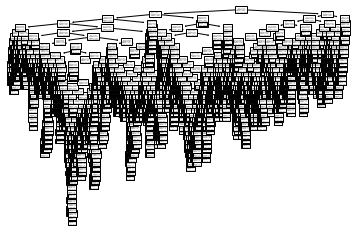

In [18]:
clf = clf.fit(c_adultTest_data, c_adultTest_target)
tree.plot_tree(clf.fit(c_adultTest_data, c_adultTest_target)) 

The accuracy of the tree is much better than Naive Bayes. But is works too slow.

## 4h).
Next apply the cost complexity pruning and find the tree it produces and name it bestTree.
Plot the best tree, and also print its confusion matrix and error rate on the test data.

In [19]:
# c_adultTest_data, c_adultTest_target 
clf2 = DecisionTreeClassifier(max_depth = 6, random_state = 0)
clf2.fit(c_adultTest_data, c_adultTest_target)
clf3 = clf2.predict(c_adultTest_data)
print('Accuracy on test set:{0}'.format(clf2.score(c_adultTest_data, c_adultTest_target)))
confusion_matrix(c_adultTest_target, clf3)

Accuracy on test set:0.8537848605577689


array([[10930,   430],
       [ 1772,  1928]], dtype=int64)

[Text(188.604, 201.90857142857143, 'X[7] <= 0.5\nentropy = 0.371\nsamples = 15060\nvalue = [11360, 3700]'),
 Text(105.462, 170.84571428571428, 'X[4] <= 10.5\nentropy = 0.496\nsamples = 6203\nvalue = [3375, 2828]'),
 Text(61.38, 139.78285714285715, 'X[10] <= 71.0\nentropy = 0.445\nsamples = 4162\nvalue = [2771, 1391]'),
 Text(35.712, 108.72, 'X[4] <= 7.5\nentropy = 0.423\nsamples = 3975\nvalue = [2767, 1208]'),
 Text(17.856, 77.65714285714284, 'X[12] <= 39.5\nentropy = 0.207\nsamples = 726\nvalue = [641, 85]'),
 Text(8.928, 46.59428571428572, 'X[10] <= 41.0\nentropy = 0.128\nsamples = 510\nvalue = [475, 35]'),
 Text(4.464, 15.531428571428563, 'entropy = 0.117\nsamples = 495\nvalue = [464, 31]'),
 Text(13.392000000000001, 15.531428571428563, 'entropy = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(26.784000000000002, 46.59428571428572, 'X[0] <= 24.5\nentropy = 0.356\nsamples = 216\nvalue = [166, 50]'),
 Text(22.32, 15.531428571428563, 'entropy = 0.251\nsamples = 95\nvalue = [81, 14]'),
 

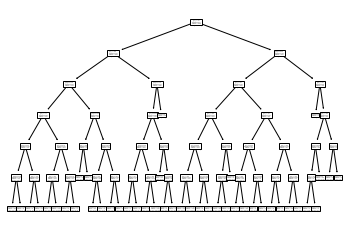

In [20]:
tree.plot_tree(clf2.fit(c_adultTest_data, c_adultTest_target))

## 4i).
Finally, develop a random forest model where at each partition only a random subset of features
of size m = sqt(d) is used, where d is the number of features. Print the confusion matrix and the
error rate for the test data. Plot the importance of parameters in order of importance using bar
charts. Plot importance with respect to changes on the classes "<=50K" and ">50K". Also, plot
the importance with respect to the mean decrease in accuracy and with respect to decrease in
the Gini index.

In [21]:
forest = RandomForestClassifier(n_estimators=9, random_state=0)
forest.fit(c_adultTest_data, c_adultTest_target)
forest.predict(c_adultTest_data)
print('Accurarcy on test set: {0}'.format(forest.score(c_adultTest_data, c_adultTest_target)))
confusion_matrix(c_adultTest_target, forest.predict(c_adultTest_data))

Accurarcy on test set: 0.9905046480743692


array([[11321,    39],
       [  104,  3596]], dtype=int64)